# YOLOv8 Keypoint Detection

## Ortam Hazırlığı

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/YOLOv8/5_keypoint_detection

/content/drive/MyDrive/YOLOv8/5_keypoint_detection


In [3]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


##Test // Prediction

In [4]:
!yolo pose predict model=yolov8n-pose.pt source='https://www.vmcdn.ca/f/files/guelphtoday/images/sports/weightlifting/20190621-kafui-ts-3.jpg'

100% 6.51M/6.51M [00:00<00:00, 26.4MB/s]
Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients

100% 1.35M/1.35M [00:00<00:00, 25.5MB/s]
image 1/1 /content/drive/MyDrive/YOLOv8/5_keypoint_detection/20190621-kafui-ts-3.jpg: 480x640 1 person, 286.2ms
Speed: 14.2ms preprocess, 286.2ms inference, 19.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/pose/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


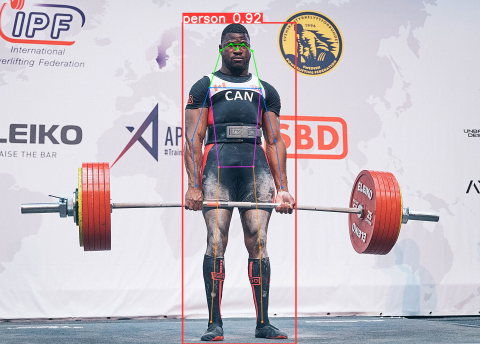

In [6]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

img_path = "runs/pose/predict/test.jpg"

img = cv2.imread(img_path)
img = imutils.resize(img, width=480)

cv2_imshow(img)


0: 480x640 1 person, 154.7ms
Speed: 2.2ms preprocess, 154.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


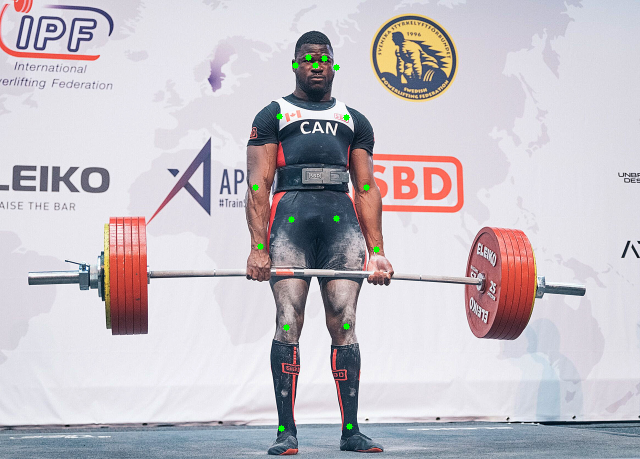

In [14]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path = "test.jpg"
model_path = "yolov8n-pose.pt"

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

model = YOLO(model_path)

results = model(img)[0]
# plotted_img = results.plot()

for result in results:
  points = np.array(result.keypoints.xy.cpu(), dtype="int")
  # print(points)
  for point in points:
    for p in point:
      # print(p)
      cv2.circle(img, (p[0], p[1]), 3, (0,255,0), -1)

cv2_imshow(img)
# cv2_imshow(plotted_img)

## Eğitim // Training

COCO8 veri kümesi ile eğitim:

In [6]:
!yolo pose train data=coco8-pose.yaml model=yolov8n-pose.pt epochs=150 imgsz=640 workers=8 batch=8 device=0 name=yolov8_pose_estimation

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=150, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8_pose_estimation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

COCO veri kümesi ile eğitim:

In [ ]:
!yolo pose train data=coco-pose.yaml model=yolov8n-pose.pt epochs=10 imgsz=640 workers=8 batch=8 device=0 name=yolov8_pose_estimation_coco

In [ ]:
# !yolo pose train model=".../last.pt" resume=True

## Test // Prediction

In [ ]:
!yolo pose predict model=.... source='...'

In [ ]:
import cv2
import imutils
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

img_path = "....."
model_path = "...."

img = cv2.imread(img_path)
img = imutils.resize(img, width=640)

model = YOLO(model_path)

results = model(img)[0]
# plotted_img = results.plot()

for result in results:
  points = np.array(result.keypoints.xy.cpu(), dtype="int")
  # print(points)
  for point in points:
    for p in point:
      # print(p)
      cv2.circle(img, (p[0], p[1]), 3, (0,255,0), -1)

cv2_imshow(img)
# cv2_imshow(plotted_img)